# Example: SAS SWAT - Data Wrangling
This example demonstrates simple data wrangling actions on the IRIS dataset.
1. Read a local CSV-file
2. Display head of table
3. Display table information
4. Display column information
5. Compute simple table statistics
6. Compute variable correlation
7. Add new column (Feature Generation)

In [2]:
# Connect to SAS Viya Platform
import swat
conn = swat.CAS(hostname='localhost', port=5570, username='sas', password='saspw')

In [3]:
# Read a local CSV-file
iris = conn.read_csv('data/iris.csv', casout=dict(name='iris', caslib='casuser'))

NOTE: Cloud Analytic Services made the uploaded file available as table IRIS in caslib CASUSER(sas).
NOTE: The table IRIS has been created in caslib CASUSER(sas) from binary data uploaded to Cloud Analytic Services.


In [4]:
# Display head of table
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Display table information
iris.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,IRIS,150,5,0,utf-8,2020-11-17T15:08:38+00:00,2020-11-17T15:08:38+00:00,2020-11-17T15:08:40+00:00,UTF8,1.921245e+09,...,0,0,0,,,0,sas,,2020-11-17T15:08:38+00:00,1.921245e+09


In [6]:
# Display column information
iris.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,sepal_length,,1,double,8,12,,0,0
1,sepal_width,,2,double,8,12,,0,0
2,petal_length,,3,double,8,12,,0,0
3,petal_width,,4,double,8,12,,0,0
4,species,,5,varchar,15,15,,0,0


Get Column Infos

Get a summary for each column

In [7]:
# Compute simple table statistics
iris.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,sepal_length,4.3,7.9,150.0,0.0,5.843333,876.5,0.828066,0.067611,0.685694,5223.85,102.168333,14.171126,86.425375,3.331256e-129,0.314911,-0.552064
1,sepal_width,2.0,4.4,150.0,0.0,3.054000,458.1,0.433594,0.035403,0.188004,1427.05,28.012600,14.197587,86.264297,4.374977e-129,0.334053,0.290781
2,petal_length,1.0,6.9,150.0,0.0,3.758667,563.8,1.764420,0.144064,3.113179,2583.00,463.863733,46.942721,26.090198,1.994305e-57,-0.274464,-1.401921
3,petal_width,0.1,2.5,150.0,0.0,1.198667,179.8,0.763161,0.062312,0.582414,302.30,86.779733,63.667470,19.236588,3.209704e-42,-0.104997,-1.339754


In [8]:
# Compute variable correlation
iris.correlation()

[CorrSimple]

 Summary Statistics in Correlation Analysis for IRIS
 
        Variable      N      Mean    Sum    StdDev  Minimum  Maximum
 0  sepal_length  150.0  5.843333  876.5  0.828066      4.3      7.9
 1   sepal_width  150.0  3.054000  458.1  0.433594      2.0      4.4
 2  petal_length  150.0  3.758667  563.8  1.764420      1.0      6.9
 3   petal_width  150.0  1.198667  179.8  0.763161      0.1      2.5

[Correlation]

 Pearson Correlation Coefficients for IRIS
 
        Variable  sepal_length  sepal_width  petal_length  petal_width
 0  sepal_length      1.000000    -0.109369      0.871754     0.817954
 1   sepal_width     -0.109369     1.000000     -0.420516    -0.356544
 2  petal_length      0.871754    -0.420516      1.000000     0.962757
 3   petal_width      0.817954    -0.356544      0.962757     1.000000

+ Elapsed: 0.00359s, sys: 0.00779s, mem: 2.47mb

In [9]:
# Add new column (Feature Generation)
iris['length_factor'] = iris['sepal_length'] * iris['petal_length']
display(iris.head())
iris = iris.drop('length_factor', axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species,length_factor
0,5.1,3.5,1.4,0.2,Iris-setosa,7.14
1,4.9,3.0,1.4,0.2,Iris-setosa,6.86
2,4.7,3.2,1.3,0.2,Iris-setosa,6.11
3,4.6,3.1,1.5,0.2,Iris-setosa,6.90
4,5.0,3.6,1.4,0.2,Iris-setosa,7.00


## Simple Plotting
1. Line Chart
2. Scatter Plot

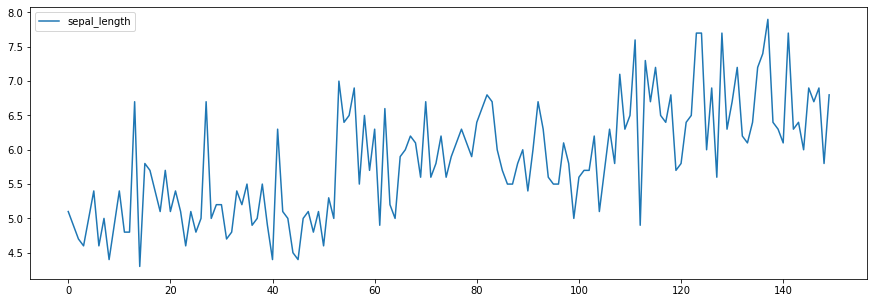

In [10]:
iris.plot.line(y='sepal_length', figsize=(15,5))

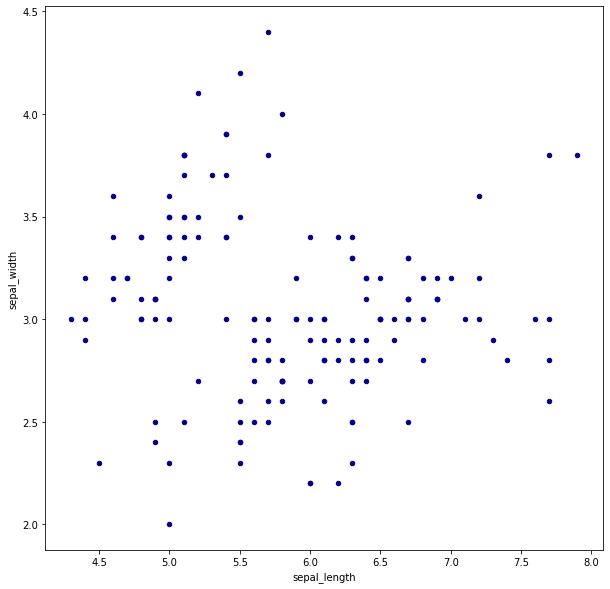

In [11]:
iris.plot.scatter(x='sepal_length', y='sepal_width', c='darkblue', figsize=(10,10))